In [2]:
#https://www.gutenberg.org/files/24869/
data_path = 'D:\\dataset\\graph\\Ramayana\\'

with open(data_path+'ramayana.txt', 'r', encoding="utf8") as f:
    text_data_list = f.readlines()
    
text_data = ','.join(text_data_list)
'''
ValueError: [E088] Text of length 2352263 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of
temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors.
If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit.
The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.
'''
text_data = text_data[18500:1000000]

import pandas as pd
import spacy 
import textacy  #0.12.0
import networkx as nx  #3.0 (also pygraphviz==1.10)
import dateparser #1.1.7
import pandas as pd
import numpy as np

nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)

#3 from text to a list of sentences
lst_docs = [sent for sent in doc.sents]



In [19]:
#testing function spacy_textacy_entity_extraction_knowlege_graph

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spacy 
import textacy  #0.12.0
from textacy import preprocessing #added
import networkx as nx  #3.0 (also pygraphviz==1.10)
import dateparser #1.1.7

#load the data 
data_path = 'D:\\dataset\\graph\\Ramayana\\'

with open(data_path+'ramayana.txt', 'r', encoding="utf8") as f:
    text_data_list = f.readlines()
    
#text_data = ','.join([str(i) for i in df[text_col].values.tolist()]) # when data is from df
text_data = ','.join([str(i) for i in text_data_list]) # when data is in list

#starting char are index, that's why started from 18500
text_data = text_data[18500:100000]
#text_data = text_data[18500:20000]

#ent_type = "DATE"
ent_type = "PERSON"
records_groupby_id = None

#spacy
nlp = spacy.load("en_core_web_sm")

print('b4 text_data:', len(text_data))
# text_data = preprocessing.remove.punctuation(text_data)
# text_data = preprocessing.normalize.whitespace(text_data)
# print('after text_data:', len(text_data))

doc = nlp(text_data)

#3 from text to a list of sentences
lst_docs = [sent for sent in doc.sents]

# dic_sub_vrb_obj = {"id":[], "text":[], "sub":[], "relation":[], "object":[]}
# dic_ent = {"id":[], "text":[], ent_type:[]}
# dic_all_ent = {"id":[], "text":[], 'all_ent':[]}
# dic_all_noun = {"id":[], "text":[], 'noun':[]}
# dic_tag_pos_dep = {"id":[], "text":[], "token":[], 'tag':[], 'pos':[], 'dep':[]}

dic_sub_vrb_obj = {"id":[], "sub":[], "relation":[], "object":[]}
dic_ent = {"id":[], ent_type:[]}
#dic_all_ent = {"id":[], 'all_ent':[]}#updated by label
dic_all_ent = {"id":[], 'all_ent':[], 'all_ent1':[], 'label':[], 'label_no':[]}#updated by label
dic_all_noun = {"id":[], 'noun':[]}
dic_tag_pos_dep = {"id":[], "token":[], 'tag':[], 'pos':[], 'dep':[]}

for n, sentence in enumerate(lst_docs):
    print(f'\n Atr sentence no:{n}, sent-len:{len(sentence)}, sentence:{sentence}')
    lst_sub_vrb_obj = list(textacy.extract.subject_verb_object_triples(sentence))
    lst_ent = list(textacy.extract.entities(sentence, include_types={ent_type}))
    lst_all_ent = list(textacy.extract.entities(sentence))
    lst_all_noun = list(textacy.extract.noun_chunks(sentence))
    list_all_tokens = list(textacy.extract.words(sentence))
    print(f'\n lst_sub_vrb_obj:{lst_sub_vrb_obj},\n lst_ent:{lst_ent},\n lst_all_ent:{lst_all_ent},\
    \n lst_all_noun:{lst_all_noun},\n list_all_tokens:{list_all_tokens}')
    
    for ent in sentence.ents:
        print(f'\n ent:{ent}, label_:{ent.label_}, label:{ent.label}')
        dic_all_ent['all_ent1'].append(str(ent))
        dic_all_ent['label'].append(str(ent.label_))
        dic_all_ent['label_no'].append(str(ent.label))
        
        
    #added
    for token in sentence:
#         print(f'\n token:{token}, text:{token.text}, tag:{token.tag_}, POS:{token.pos_},\
#         DEP:{token.dep_}, explain:{spacy.explain(token.tag_)},\
#         has_vector:{token.has_vector}, vector_norm:{token.vector_norm}, is_oov:{token.is_oov}')
        
        dic_tag_pos_dep['id'].append(n)
        #dic_tag_pos_dep['text'].append(str(sentence.text))
        dic_tag_pos_dep['token'].append(str(token))
        dic_tag_pos_dep['tag'].append(str(token.tag_))
        dic_tag_pos_dep['pos'].append(str(token.pos_))
        dic_tag_pos_dep['dep'].append(str(token.dep_))
    #print(f'dic_tag_pos_dep-len:{len(dic_tag_pos_dep)}, dic_tag_pos_dep:{dic_tag_pos_dep}')
    dtf_tag_pos_dep = pd.DataFrame(dic_tag_pos_dep)
    
    print('\n\n #1 lst_ent')
    if len(lst_ent) > 0:
        for attr in lst_ent:
            print('\n attr:', attr)
            dic_ent["id"].append(n)
            #dic_ent["text"].append(sentence.text)
            dic_ent[ent_type].append(str(attr))
#     else:
#         dic_ent["id"].append(n)
#         #dic_ent["text"].append(sentence.text)
#         dic_ent[ent_type].append(np.nan)
        
    print(f'dic_ent-len:{len(dic_ent)}, dic_ent:{dic_ent}')
    dtf_ent = pd.DataFrame(dic_ent)

    print('\n\n #2 lst_all_ent')
    if len(lst_all_ent) > 0:
        for attr1 in lst_all_ent:
            dic_all_ent["id"].append(n)
            #dic_all_ent["text"].append(sentence.text)
            dic_all_ent['all_ent'].append(str(attr1))
#     else:
#         dic_all_ent["id"].append(n)
#         #dic_all_ent["text"].append(sentence.text)
#         dic_all_ent['all_ent'].append(np.nan)
    print(f'dic_all_ent-len:{len(dic_all_ent)}, dic_all_ent:{dic_all_ent}')
    dtf_all_ent = pd.DataFrame(dic_all_ent)

    if records_groupby_id:
        dtf_all_ent = dtf_all_ent.groupby(records_groupby_id).agg(lambda x: list(x)).reset_index()

    print('\n\n #3 lst_sub_vrb_obj')
    if len(lst_sub_vrb_obj) > 0:
        for m, sent in enumerate(lst_sub_vrb_obj): #one sentence can have more than 1 one sub/verb/obj
            subj = "_".join(map(str, sent.subject))
            obj  = "_".join(map(str, sent.object))
            relation = "_".join(map(str, sent.verb))
            dic_sub_vrb_obj["id"].append(n)
            #dic_sub_vrb_obj["text"].append(sentence.text)
            dic_sub_vrb_obj["sub"].append(subj)
            dic_sub_vrb_obj["object"].append(obj)
            dic_sub_vrb_obj["relation"].append(relation)
#     else:
#         dic_sub_vrb_obj["id"].append(n)
#         #dic_sub_vrb_obj["text"].append(sentence.text)
#         dic_sub_vrb_obj["sub"].append(np.nan)
#         dic_sub_vrb_obj["object"].append(np.nan)
#         dic_sub_vrb_obj["relation"].append(np.nan)
    print(f'dic_sub_vrb_obj-len:{len(dic_sub_vrb_obj)}, dic_sub_vrb_obj:{dic_sub_vrb_obj}')
    dtf_sub_vrb_obj = pd.DataFrame(dic_sub_vrb_obj)

    print('\n\n #4 lst_all_noun')
    if len(lst_all_noun) > 0:
        for attr1 in lst_all_noun:
            dic_all_noun["id"].append(n)
            #dic_all_noun["text"].append(sentence.text)
            dic_all_noun['noun'].append(str(attr1))
#     else:
#         dic_all_noun["id"].append(n)
#         #dic_all_noun["text"].append(sentence.text)
#         dic_all_noun['all_ent'].append(np.nan) #issue
    print(f'dic_all_noun-len:{len(dic_all_noun)}, dic_all_noun:{dic_all_noun}')
    dtf_all_noun = pd.DataFrame(dic_all_noun)
    dtf_all_noun = dtf_all_noun.groupby('id').agg(lambda x: list(x)).reset_index()
    

dtf_ent
dtf_all_ent
dtf_sub_vrb_obj
dtf_all_noun
dtf_tag_pos_dep

print(f'dtf_ent:{dtf_ent.shape}, dtf_all_ent:{dtf_all_ent.shape}, dtf_sub_vrb_obj:{dtf_sub_vrb_obj.shape}\
dtf_all_noun:{dtf_all_noun.shape}, dtf_tag_pos_dep:{dtf_tag_pos_dep.shape}')

b4 text_data: 81500

 Atr sentence no:0, sent-len:68, sentence:ith accent clear and strong
,  Ráma, aye Ráma, in his deathless lay.
,
,Where breathes the man can listen to the strain
,  That flows in music from Válmíki’s tongue,
,Nor feel his feet the path of bliss attain
,  When Ráma’s glory by the saint is sung!


 lst_sub_vrb_obj:[SVOTriple(subject=[Ráma], verb=[aye], object=[Ráma]), SVOTriple(subject=[man], verb=[can, listen], object=[breathes]), SVOTriple(subject=[That], verb=[flows], object=[Ráma, feet, path]), SVOTriple(subject=[Ráma], verb=[feel], object=[feet, path])],
 lst_ent:[Ráma, Ráma, Ráma],
 lst_all_ent:[Ráma, Ráma, Válmíki, Ráma],    
 lst_all_noun:[ith accent clear and strong
,  Ráma, Ráma, his deathless lay, man, strain, That, music, Válmíki’s tongue, his feet, path, bliss attain, Ráma’s glory, saint],
 list_all_tokens:[ith, accent, clear, strong, Ráma, aye, Ráma, deathless, lay, breathes, man, listen, strain, flows, music, Válmíki, tongue, feel, feet, path, bliss, a


 lst_sub_vrb_obj:[],
 lst_ent:[],
 lst_all_ent:[],    
 lst_all_noun:[his eyes, that, majesty],
 list_all_tokens:[Large, eyes, sweetly, shine, majesty, divine]


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15', 'Ráma', 'Tall', 'Graced', 'Deep', 'Graced']}


 #2 lst_all_ent
dic_all_ent-len:5, dic_all_ent:{'id': [0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6], 'all_ent': ['Ráma', 'Ráma', 'Válmíki', 'Ráma', 'Rámáyan', 'free.(4', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Saint Válmíki', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Nárad', 'Válmíki', 'first', 'Firm', 'Bounteous', 'Devoid', 'Whom', 'Queen Fortune’s(10', 'Sun', 'Moon', 'Grant, Saint divine,(13', 'Nárad', 'Ikshváku’s(15', 'Ráma


 lst_sub_vrb_obj:[SVOTriple(subject=[Bharat], verb=[refused], object=[to, reign]), SVOTriple(subject=[brother], verb=[fell], object=[Thy, claim]), SVOTriple(subject=[brother], verb=[cried], object=[Thy, claim])],
 lst_ent:[],
 lst_all_ent:[Bharat, Forth],    
 lst_all_noun:[Bharat, his son, the twice-born(29) train, woods, he, His brother, his feet, Thy claim, men, our lord, king],
 list_all_tokens:[Bharat, son, refused, reign, urged, twice, born(29, train, Forth, woods, fared, meet, brother, fell, feet, cried, Thy, claim, men, allow, O, come, lord, king, thou]

 ent:Bharat, label_:ORG, label:383

 ent:Forth, label_:ORG, label:383


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshv


 lst_sub_vrb_obj:[SVOTriple(subject=[Ráma], verb=[lent], object=[ear]), SVOTriple(subject=[Ráma], verb=[promised], object=[to, allay, his, fear]), SVOTriple(subject=[Sugríva], verb=[warned], object=[him]), SVOTriple(subject=[credence], verb=[Showed], object=[fiend(33]), SVOTriple(subject=[corse], verb=[Seemed], object=[nothing]), SVOTriple(subject=[He], verb=[kicked], object=[it]), SVOTriple(subject=[He], verb=[cast], object=[it, leagues(34])],
 lst_ent:[Ráma],
 lst_all_ent:[Ráma, Sugríva, Báli],    
 lst_all_noun:[Ráma, willing ear, his fear, Sugríva, him, might, Báli, fight, credence, his tale, huge fiend(33, prostrate corse, mountain size, nothing, hero’s eyes, He, it, it, it],
 list_all_tokens:[Ráma, lent, willing, ear, promised, allay, fear, Sugríva, warned, Báli, matchless, fight, credence, tale, gain, Showed, huge, fiend(33, Báli, slain, prostrate, corse, mountain, size, hero, eyes, lightly, kicked, lay, cast, leagues(34, away]

 ent:Ráma, label_:PERSON, label:380

 ent:Sugríva


 lst_sub_vrb_obj:[SVOTriple(subject=[He], verb=[gave], object=[ring, token])],
 lst_ent:[],
 lst_all_ent:[],    
 lst_all_noun:[He, hapless girl, ring, token, her lord, king],
 list_all_tokens:[gave, hapless, girl, ring, token, lord, king]


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15', 'Ráma', 'Tall', 'Graced', 'Deep', 'Graced', 'Queen Kauśalyá’s(20)heart', 'Firm', 'Unfathomed', 'Vishṇu', 'Patient', 'Daśaratha(24', 'Kaikeyí', 'Ráma', 'Kaikeyí', 'Lakshmaṇ', 'Ráma', 'Janak', 'Gangá', 'Guha', 'Nishádas', 'Ráma', 'Ráma', 'Ráma', 'Observant', 'Ayodhyá', 'Fared Ráma', 'A


 Atr sentence no:39, sent-len:108, sentence:,By grace of Heaven he raised to life
,The chieftains slain in mortal strife;
,Then in the magic chariot through
,The clouds to Nandigráma flew.
,Met by his faithful brothers there,
,He loosed his votive coil of hair:
,Thence fair Ayodhyá’s town he gained,
,And o’er his father’s kingdom reigned.
,Disease or famine ne’er oppressed
,His happy people, richly blest
,With all the joys of ample wealth,
,Of sweet content and perfect health.


 lst_sub_vrb_obj:[SVOTriple(subject=[Met, He], verb=[loosed], object=[coil, town]), SVOTriple(subject=[Disease, famine, ne’er], verb=[o’er], object=[coil, town, people]), SVOTriple(subject=[Disease, famine, ne’er], verb=[oppressed], object=[people])],
 lst_ent:[Thence],
 lst_all_ent:[Nandigráma, Thence, Ayodhyá],    
 lst_all_noun:[grace, Heaven, he, life, chieftains, mortal strife, magic chariot, clouds, Nandigráma, Met, his faithful brothers, He, his votive coil, hair, Thence fair Ayodhyá’s town, he, his fat


 lst_sub_vrb_obj:[SVOTriple(subject=[tale], verb=[rehearsed], object=[fame]), SVOTriple(subject=[He], verb=[paid], object=[worship])],
 lst_ent:[Departed],
 lst_all_ent:[first, Departed, Válmíki, Gangá],    
 lst_all_noun:[him, fame, tale, He, his mental worship, his pupil, saint, seer, his heavenly sphere, his cot Válmíki, Tamasá’s(44, side, Gangá’s tide],
 list_all_tokens:[fame, tale, rehearsed, paid, mental, worship, pupil, humbly, bent, saint, eloquent, honoured, dismissed, seer, Departed, heavenly, sphere, cot, Válmíki, hied, Tamasá’s(44, sequestered, far, remote, Gangá, tide]

 ent:first, label_:ORDINAL, label:396

 ent:Departed, label_:PERSON, label:380

 ent:Válmíki, label_:GPE, label:384

 ent:Gangá, label_:ORG, label:383


 #1 lst_ent

 attr: Departed
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 2



 #1 lst_ent

 attr: ruth
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15', 'Ráma', 'Tall', 'Graced', 'Deep', 'Graced', 'Queen Kauśalyá’s(20)heart', 'Firm', 'Unfathomed', 'Vishṇu', 'Patient', 'Daśaratha(24', 'Kaikeyí', 'Ráma', 'Kaikeyí', 'Lakshmaṇ', 'Ráma', 'Janak', 'Gangá', 'Guha', 'Nishádas', 'Ráma', 'Ráma', 'Ráma', 'Observant', 'Ayodhyá', 'Fared Ráma', 'Agastya', 'Indra', 'Indra', 'Ráma', 'Ráma', 'Rávaṇ', 'Rávaṇ', 'Márícha', 'Márícha', 'Rávaṇ', 'Ráma', 'Ráma', 'Ráma', 'Raghu(32', 'Jaṭáyu', 'K


 Atr sentence no:61, sent-len:40, sentence:,Of all the deeds his arm has done
,Upon this earth, omit not one,
,And thus the noble life record
,Of that wise, brave, and virtuous lord.


 lst_sub_vrb_obj:[],
 lst_ent:[],
 lst_all_ent:[],    
 lst_all_noun:[the deeds, his arm, earth, that wise, brave, and virtuous lord],
 list_all_tokens:[deeds, arm, earth, omit, noble, life, record, wise, brave, virtuous, lord]


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15',


 ent:first, label_:ORDINAL, label:396


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15', 'Ráma', 'Tall', 'Graced', 'Deep', 'Graced', 'Queen Kauśalyá’s(20)heart', 'Firm', 'Unfathomed', 'Vishṇu', 'Patient', 'Daśaratha(24', 'Kaikeyí', 'Ráma', 'Kaikeyí', 'Lakshmaṇ', 'Ráma', 'Janak', 'Gangá', 'Guha', 'Nishádas', 'Ráma', 'Ráma', 'Ráma', 'Observant', 'Ayodhyá', 'Fared Ráma', 'Agastya', 'Indra', 'Indra', 'Ráma', 'Ráma', 'Rávaṇ', 'Rávaṇ


 lst_sub_vrb_obj:[SVOTriple(subject=[meeting], verb=[gained], object=[bow]), SVOTriple(subject=[home], verb=[set], object=[Śúrpaṇakhá, underwent, mockery, disfigurement]), SVOTriple(subject=[fall], verb=[roused], object=[Śúrpaṇakhá, underwent, mockery, disfigurement]), SVOTriple(subject=[journeyed, reach], verb=[drew], object=[speech]), SVOTriple(subject=[journeyed, reach], verb=[had], object=[speech]), SVOTriple(subject=[both], verb=[had, sought], object=[which]), SVOTriple(subject=[Báli, Sugríva], verb=[fought], object=[speech])],
 lst_ent:[Indra, Triśirá, Khara, Rávaṇ, Márícha, Kabandha, Met Hanumán, Raghu, Rishyamúk, Báli],
 lst_all_ent:[Śarabhanga, Indra, Agastya, Virádha, Panchavaṭa, Śúrpaṇakhá, Triśirá, Khara, Rávaṇ, Márícha, Kabandha, Pampá, Met Hanumán, Raghu, Pampá, Rishyamúk, Báli, Sugríva],    
 lst_all_noun:[How Śarabhanga’s dwelling-place, They, Indra, face, meeting, Agastya, ;
,The heavenly bow, him, Ráma, Virádha, Their home, Panchavaṭa, ,How Śúrpaṇakhá underwent, mock



 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15', 'Ráma', 'Tall', 'Graced', 'Deep', 'Graced', 'Queen Kauśalyá’s(20)heart', 'Firm', 'Unfathomed', 'Vishṇu', 'Patient', 'Daśaratha(24', 'Kaikeyí', 'Ráma', 'Kaikeyí', 'Lakshmaṇ', 'Ráma', 'Janak', 'Gangá', 'Guha', 'Nishádas', 'Ráma', 'Ráma', 'Ráma', 'Observant', 'Ayodhyá', 'Fared Rá


 lst_sub_vrb_obj:[SVOTriple(subject=[Ráma], verb=[cast], object=[queen])],
 lst_ent:[Ráma, Canto IV],
 lst_all_ent:[day, Ráma, Canto IV],    
 lst_all_noun:[Ráma, their discharge, Ráma, his queen, people’s love, saint, Válmíki, closing verses, all],
 list_all_tokens:[Ráma, king, ordained, legions, discharge, obtained, Ráma, cast, queen, away, grew, people, love, day, saint, Válmíki, tell, Whate’er, Ráma, life, befell, closing, verses, come, befall, Canto, IV]

 ent:each day, label_:DATE, label:391

 ent:Ráma, label_:PERSON, label:380

 ent:Canto IV, label_:PERSON, label:380


 #1 lst_ent

 attr: Ráma

 attr: Canto IV
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 


 lst_sub_vrb_obj:[],
 lst_ent:[],
 lst_all_ent:[Rhapsodists],    
 lst_all_noun:[Rhapsodists],
 list_all_tokens:[Rhapsodists]

 ent:Rhapsodists, label_:NORP, label:381


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', 'Bounteous', 'Whom', 'Queen Fortune’s(10', 'Moon', 'Nárad', 'Ikshváku’s(15', 'Ráma', 'Tall', 'Graced', 'Deep', 'Graced', 'Queen Kauśalyá’s(20)heart', 'Firm', 'Un


 lst_sub_vrb_obj:[],
 lst_ent:[],
 lst_all_ent:[One, one, One, One, One],    
 lst_all_noun:[black-deer’s hide, clay pitcher, his hoard, twisted munja cord.(59, his joy, axe, their plaited locks],
 list_all_tokens:[saint, black, deer, hide, bring, sacrificial, string, clay, pitcher, hoard, twisted, munja, cord.(59, joy, axe, find, braid, plaited, locks, bind]

 ent:One, label_:CARDINAL, label:397

 ent:one, label_:CARDINAL, label:397

 ent:One, label_:CARDINAL, label:397

 ent:One, label_:CARDINAL, label:397

 ent:One, label_:CARDINAL, label:397


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68,


 lst_sub_vrb_obj:[SVOTriple(subject=[land], verb=[Was, bounded], object=[sea]), SVOTriple(subject=[arms], verb=[had, made], object=[own])],
 lst_ent:[],
 lst_all_ent:[],    
 lst_all_noun:[land, their arms, sea],
 list_all_tokens:[land, arms, bounded, sea]


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 lst_sub_vrb_obj:[SVOTriple(subject=[these], verb=[to, guide], object=[schemes]), SVOTriple(subject=[sun], verb=[Wins], object=[glory])],
 lst_ent:[],
 lst_all_ent:[],    
 lst_all_noun:[these, his schemes, his might, sun, glory, his beams],
 list_all_tokens:[guide, schemes, risen, sun, Wins, glory, beams, Canto, VIII]


 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 11


 Atr sentence no:146, sent-len:113, sentence:But when they hear the monarch’s speech,
,All these their master will beseech,
,With trembling hearts and looks of woe,
,To spare them, for they fear to go.
,And many a plan will they declare
,  And crafty plots will frame,
,And promise fair to show him there,
,  Unforced, with none to blame.
,On every word his lords shall say,
,  The king will meditate,
,And on the third returning day
,  Recall them to debate.


 lst_sub_vrb_obj:[SVOTriple(subject=[they], verb=[hear], object=[speech]), SVOTriple(subject=[they], verb=[will, declare], object=[beseech, plan]), SVOTriple(subject=[they], verb=[fear], object=[to, go]), SVOTriple(subject=[plots], verb=[will, frame], object=[beseech, plan, to, show, him, there]), SVOTriple(subject=[they], verb=[promise], object=[to, show, him, there]), SVOTriple(subject=[king], verb=[will, meditate], object=[them]), SVOTriple(subject=[king], verb=[Recall], object=[them])],
 lst_ent:[],
 lst_all_ent:[third returnin



 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 115, 115, 115, 124, 124, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 128, 132, 138, 141, 141, 141, 142, 142, 143, 144, 144, 144, 147, 147, 148, 150, 150, 150, 150], 'PERSON': ['Ráma', 'Ráma', 'Ráma', 'Prince of Hermits', 'Ráma', 'Ráma', 'Hail', 'Hail', 'Canto I. Nárad.(7', 'Firm', '


 Atr sentence no:156, sent-len:58, sentence:,Forth came the hermit’s son to view
,The wondrous sight to him so new,
,  And gazed in rapt surprise,
,For from his natal hour till then
,On woman or the sons of men
,  He ne’er had cast his eyes.
,

 lst_sub_vrb_obj:[SVOTriple(subject=[Forth], verb=[came], object=[eyes]), SVOTriple(subject=[He], verb=[had, cast], object=[eyes])],
 lst_ent:[Forth],
 lst_all_ent:[Forth, hour],    
 lst_all_noun:[Forth, hermit’s son, wondrous sight, him, rapt surprise, his natal hour, woman, sons, men, He, ne’er, his eyes],
 list_all_tokens:[Forth, came, hermit, son, view, wondrous, sight, new, gazed, rapt, surprise, natal, hour, till, woman, sons, men, ne’er, cast, eyes]

 ent:Forth, label_:PERSON, label:380

 ent:hour, label_:TIME, label:392


 #1 lst_ent

 attr: Forth
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 Atr sentence no:178, sent-len:132, sentence:,The maiden home in triumph led,
,To Rishyaśring the king shall wed.
,And he with loving joy and pride
,Shall take her for his honoured bride.
,And Daśaratha to a rite
,That best of Bráhmans shall invite
,  With supplicating prayer,
,To celebrate the sacrifice
,To win him sons and Paradise,(83)
,That he will fain prepare.
,From him the lord of men at length
,  The boon he seeks shall gain,
,And see four sons of boundless strength
,  His royal line maintain.”
,“Thus did the godlike saint of old
,  

 lst_sub_vrb_obj:[SVOTriple(subject=[home], verb=[led], object=[lord, boon]), SVOTriple(subject=[he], verb=[Shall, take], object=[her]), SVOTriple(subject=[best], verb=[shall, invite], object=[To, celebrate, the, sacrifice, 
, To, win, him, sons, and, Paradise,(83]), SVOTriple(subject=[he], verb=[will, fain], object=[prepare]), SVOTriple(subject=[he], verb=[seeks], object=[shall, gain, ,, 
]), SVOTriple(subject=[home], verb=[see], object=[sons])]


 lst_sub_vrb_obj:[SVOTriple(subject=[sacrifice], verb=[Said], object=[he]), SVOTriple(subject=[who], verb=[ruled], object=[Angas]), SVOTriple(subject=[consent], verb=[was, won], object=[he]), SVOTriple(subject=[he], verb=[turned], object=[he])],
 lst_ent:[Said],
 lst_all_ent:[Said],    
 lst_all_noun:[My sacrifice, he, who, Angas, Yea, his consent, he, hermit’s son],
 list_all_tokens:[sacrifice, aid, Said, ruled, Angas, Yea, consent, won, turned, away, warn, hermit, son]

 ent:Said, label_:PERSON, label:380


 #1 lst_ent

 attr: Said
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 7



 #1 lst_ent

 attr: Daśaratha
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 115, 115, 115, 124, 124, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 128, 132, 138, 141, 141, 141, 142, 142, 143, 144, 144, 144, 147, 147, 148, 150, 150, 150, 150, 153, 156, 157, 158, 158, 160, 160, 167, 169, 169, 172, 172, 172, 175, 176, 176, 177, 177, 177, 177, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 115, 115, 115, 124, 124, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 128, 132, 138, 141, 141, 141, 142, 142, 143, 144, 144, 144, 147, 147, 148, 150, 150, 150, 150, 153, 156, 157, 158, 158, 160, 160, 167, 169, 169, 172, 172, 172, 175, 176, 176, 177, 177, 177, 177, 178, 183, 183, 184,



 #1 lst_ent

 attr: Bel(97

 attr: Khádir(98

 attr: Fig
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 115, 115, 115, 124, 124, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 128, 132, 138, 141, 141, 141, 142, 142, 143, 144, 144, 144, 147, 147, 148, 150, 150, 150, 150, 153, 156, 157, 158, 158, 160, 160, 167, 169, 169, 172, 172, 172, 175, 176,


 lst_sub_vrb_obj:[SVOTriple(subject=[Queen, She], verb=[smote], object=[steed])],
 lst_ent:[Queen],
 lst_all_ent:[Queen, Kauśalyá, three, night, evening, three, Kauśalyá],    
 lst_all_noun:[Queen, Kauśalyá, delighted mien, reverent steps, him, sweet wreaths, victim, three swords, order, She, steed, joy, slew, queen, son, calm and steady heart, fain, dead charger’s side, evening, break, day, three priests, their care, steed, Kauśalyá],
 list_all_tokens:[Queen, Kauśalyá, delighted, mien, reverent, steps, paced, sweet, wreaths, victim, graced, swords, order, smote, steed, joy, slew, night, queen, son, gain, calm, steady, heart, fain, dead, charger, stay, evening, till, break, day, came, priests, care, lead, queens, touch, steed, Kauśalyá, attend, company, aid, lend]

 ent:Queen, label_:PERSON, label:380

 ent:Kauśalyá, label_:NORP, label:381

 ent:three, label_:CARDINAL, label:397

 ent:That night, label_:TIME, label:392

 ent:evening, label_:TIME, label:392

 ent:three, label_:CARDINAL

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 115, 115, 115, 124, 124, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 128, 132, 138, 141, 141, 141, 142, 142, 143, 144, 144, 144, 147, 147, 148, 150, 150, 150, 150, 153, 156, 157, 158, 158, 160, 160, 167, 169, 169, 172, 172, 172, 175, 176, 176, 177, 177, 177, 177, 178, 183, 183, 184,


 lst_sub_vrb_obj:[SVOTriple(subject=[God, demon, e’er], verb=[should, kill], object=[That]), SVOTriple(subject=[We], verb=[Bear], object=[rage]), SVOTriple(subject=[We], verb=[fell], object=[rage, earth, heaven, hell]), SVOTriple(subject=[We], verb=[Scourges], object=[earth, heaven, hell]), SVOTriple(subject=[sun], verb=[withholds], object=[glow, wind]), SVOTriple(subject=[fire], verb=[restrains], object=[heat]), SVOTriple(subject=[sea], verb=[fears], object=[to, rave])],
 lst_ent:[Gavest],
 lst_all_ent:[days, Gavest, Smites, Rávaṇ],    
 lst_all_noun:[thou, days, boon, that, him, That, God, demon e’er, His charmed life, so thy will, We, high behest, his rage, giants, earth, heaven, hell, thy boon, his impious rage, Smites saint, bard, God, sun, himself, his glow, wind, fear forbears, fire, his wonted heat, dreaded Rávaṇ’s feet, wandering wave, sea, him],
 list_all_tokens:[thou, pleased, days, old, Gavest, boon, makes, bold, God, demon, e’er, kill, charmed, life, thy, honouring, high,



 #1 lst_ent
dic_ent-len:2, dic_ent:{'id': [0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 16, 16, 17, 17, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 22, 22, 24, 27, 28, 29, 29, 32, 32, 33, 33, 33, 35, 35, 36, 37, 37, 37, 37, 39, 41, 41, 43, 43, 45, 47, 49, 52, 53, 54, 55, 56, 59, 60, 60, 62, 62, 63, 63, 64, 64, 64, 65, 68, 68, 68, 68, 68, 68, 68, 69, 69, 70, 70, 72, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 76, 77, 79, 82, 84, 85, 86, 88, 88, 90, 90, 90, 91, 91, 91, 92, 92, 93, 94, 97, 100, 100, 100, 100, 101, 101, 103, 103, 110, 110, 114, 114, 115, 115, 115, 115, 115, 115, 115, 124, 124, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 128, 132, 138, 141, 141, 141, 142, 142, 143, 144, 144, 144, 147, 147, 148, 150, 150, 150, 150, 153, 156, 157, 158, 158, 160, 160, 167, 169, 169, 172, 172, 172, 175, 176, 176, 177, 177, 177, 177, 178, 183, 183, 184,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [100]:
text_data

'ith accent clear and strong\n, Ráma, aye Ráma, in his deathless lay.\n,\n,Where breathes the man can listen to the strain\n, That flows in music from Válmíki’s tongue,\n,Nor feel his feet the path of bliss attain\n, When Ráma’s glory by the saint is sung!\n,\n,The stream Rámáyan leaves its sacred fount\n, The whole wide world from sin and stain to free.(4)\n,The Prince of Hermits is the parent mount,\n, The lordly Ráma is the darling sea.\n,\n,Glory to him whose fame is ever bright!\n, Glory to him, Prachetas’(5)holy son!\n,Whose pure lips quaff with ever new delight\n, The nectar-sea of deeds by Ráma done.\n,\n,Hail, arch-ascetic, pious, good, and kind!\n, Hail, Saint Válmíki, lord of every lore!\n,Hail, holy Hermit, calm and pure of mind!\n, Hail, First of Bards, Válmíki, hail once more!\n,\n,\n,\n,\n,\n,BOOK I.(6)\n,\n,\n,\n,\n,Canto I. Nárad.(7)\n,\n,\n,OM.(8)\n,\n, To sainted Nárad, prince of those\n,Whose lore in words of wisdom flows.\n,Whose constant care and chief delight\n,W

In [12]:
dtf_all_ent

id            all_ent               all_ent1    label label_no
0    0               Ráma                   Ráma   PERSON      380
1    0               Ráma                   Ráma   PERSON      380
2    0            Válmíki                Válmíki      GPE      384
3    0               Ráma                   Ráma   PERSON      380
4    1            Rámáyan                Rámáyan     NORP      381
5    1            free.(4                free.(4      ORG      383
6    1  Prince of Hermits  The Prince of Hermits   PERSON      380
7    1               Ráma                   Ráma   PERSON      380
8    2               Ráma                   Ráma   PERSON      380
9    3               Hail                   Hail   PERSON      380
10   3      Saint Válmíki          Saint Válmíki      GPE      384
11   3               Hail                   Hail   PERSON      380
12   3               Hail                   Hail      ORG      383
13   3  Canto I. Nárad.(7      Canto I. Nárad.(7   PERSON      380
14   3              Nárad                  Nárad      GPE      384
15   3            Válmíki                Válmíki      GPE      384
16   3              first                  first  ORDINAL      396
17   3               Firm                   Firm   PERSON      380
18   3          Bounteous              Bounteous   PERSON      380
19   3             Devoid                 Devoid      ORG      383
20   3               Whom                   Whom   PERSON      380

In [5]:
dir(textacy.extract)
dtf_tag_pos_dep

id   token  tag    pos       dep
0     0     ith  NNP  PROPN  compound
1     0  accent  NNP  PROPN      nmod
2     0   clear   JJ    ADJ      amod
3     0     and   CC  CCONJ        cc
4     0  strong   JJ    ADJ      conj
..   ..     ...  ...    ...       ...
428   3     The   DT    DET       det
429   3  triple   JJ    ADJ      amod
430   3   world   NN   NOUN     nsubj
431   3     can   MD    AUX       aux
432   3     gua   VB   VERB      conj

[433 rows x 5 columns]

In [91]:
dtf_all_ent

id                                               text            all_ent
0    0  ith accent clear and strong\n,  Ráma, aye Ráma...               Ráma
1    0  ith accent clear and strong\n,  Ráma, aye Ráma...               Ráma
2    0  ith accent clear and strong\n,  Ráma, aye Ráma...            Válmíki
3    0  ith accent clear and strong\n,  Ráma, aye Ráma...               Ráma
4    1  ,\n,The stream Rámáyan leaves its sacred fount...            Rámáyan
5    1  ,\n,The stream Rámáyan leaves its sacred fount...            free.(4
6    1  ,\n,The stream Rámáyan leaves its sacred fount...  Prince of Hermits
7    1  ,\n,The stream Rámáyan leaves its sacred fount...               Ráma
8    2            The nectar-sea of deeds by Ráma done.\n               Ráma
9    3  ,\n,Hail, arch-ascetic, pious, good, and kind!...               Hail
10   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...      Saint Válmíki
11   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...               Hail
12   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...               Hail
13   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...  Canto I. Nárad.(7
14   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...              Nárad
15   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...            Válmíki
16   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...              first
17   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...               Firm
18   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...          Bounteous
19   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...             Devoid
20   3  ,\n,Hail, arch-ascetic, pious, good, and kind!...               Whom

In [52]:
lst_all_noun

[His voice]

In [53]:
dtf_sub_vrb_obj

id                                               text             sub  \
0      0  ith accent clear and strong\n,  Ráma, aye Ráma...            Ráma   
1      0  ith accent clear and strong\n,  Ráma, aye Ráma...             man   
2      0  ith accent clear and strong\n,  Ráma, aye Ráma...            That   
3      0  ith accent clear and strong\n,  Ráma, aye Ráma...            Ráma   
4      1  ,\n,The stream Rámáyan leaves its sacred fount...  stream_Rámáyan   
..   ...                                                ...             ...   
730  252  ,That childless prince of high renown,\n,Who s...          prince   
731  252  ,That childless prince of high renown,\n,Who s...             Who   
732  252  ,That childless prince of high renown,\n,Who s...            that   
733  253  The monarch watched the sacred rite,\n,When a ...         monarch   
734  254         ,His voice was drumlike, loud and low,\n,H             NaN   

       relation          object  
0           aye            Ráma  
1    can_listen        breathes  
2         flows  Ráma_feet_path  
3          feel       feet_path  
4        leaves           fount  
..          ...             ...  
730    Prepared            rite  
731       smote          foemen  
732        wins       heir.(109  
733     watched            form  
734         NaN             NaN  

[735 rows x 5 columns]

In [49]:
dtf_all_noun

id                                               text  \
0      0  [ith accent clear and strong\n,  Ráma, aye Rám...   
1      1  [,\n,The stream Rámáyan leaves its sacred foun...   
2      2  [The nectar-sea of deeds by Ráma done.\n, The ...   
3      3  [,\n,Hail, arch-ascetic, pious, good, and kind...   
4      4  [Fire, and Air?\n,Grant, Saint divine,(13) the...   
..   ...                                                ...   
250  250  [The thorn that saints and hermits fear,\n,   ...   
251  251  [The Nectar.\n,\n,\n,When wisest Vishṇu thus h...   
252  252  [,That childless prince of high renown,\n,Who ...   
253  253  [The monarch watched the sacred rite,\n,When a...   
254  254       [,His voice was drumlike, loud and low,\n,H]   

                                                  noun  
0    [ith accent clear and strong\n,  Ráma, Ráma, h...  
1    [stream Rámáyan, its sacred fount, whole wide ...  
2                            [nectar-sea, deeds, Ráma]  
3    [lord, lore, mind, Bards, Válmíki, hail, ,\n,\...  
4    [Fire, Air, Grant, Saint divine,(13, boon, I, ...  
..                                                 ...  
250  [thorn, that, saints, hermits, plague, that, n...  
251  [Nectar, Vishṇu, His promise, Gods, heaven, He...  
252  [childless prince, high renown, Who, war, his ...  
253  [monarch, sacred rite,\n,When a vast form, awf...  
254                                        [His voice]  

[255 rows x 3 columns]

In [50]:
dtf_all_ent

id                                               text   all_ent
0      0  ith accent clear and strong\n,  Ráma, aye Ráma...      Ráma
1      0  ith accent clear and strong\n,  Ráma, aye Ráma...      Ráma
2      0  ith accent clear and strong\n,  Ráma, aye Ráma...   Válmíki
3      0  ith accent clear and strong\n,  Ráma, aye Ráma...      Ráma
4      1  ,\n,The stream Rámáyan leaves its sacred fount...   Rámáyan
..   ...                                                ...       ...
774  252  ,That childless prince of high renown,\n,Who s...  Prepared
775  252  ,That childless prince of high renown,\n,Who s...    Vishṇu
776  252  ,That childless prince of high renown,\n,Who s...      Bade
777  253  The monarch watched the sacred rite,\n,When a ...      Dark
778  254         ,His voice was drumlike, loud and low,\n,H       NaN

[779 rows x 3 columns]

In [51]:
dtf_ent

id                                               text      DATE
0      0  ith accent clear and strong\n,  Ráma, aye Ráma...       NaN
1      1  ,\n,The stream Rámáyan leaves its sacred fount...       NaN
2      2            The nectar-sea of deeds by Ráma done.\n       NaN
3      3  ,\n,Hail, arch-ascetic, pious, good, and kind!...       NaN
4      4  Fire, and Air?\n,Grant, Saint divine,(13) the ...  Obedient
..   ...                                                ...       ...
253  250  The thorn that saints and hermits fear,\n,    ...       NaN
254  251  The Nectar.\n,\n,\n,When wisest Vishṇu thus ha...       NaN
255  252  ,That childless prince of high renown,\n,Who s...       NaN
256  253  The monarch watched the sacred rite,\n,When a ...       NaN
257  254         ,His voice was drumlike, loud and low,\n,H       NaN

[258 rows x 3 columns]

In [42]:
list_all_tokens
lst_all_ent

[]

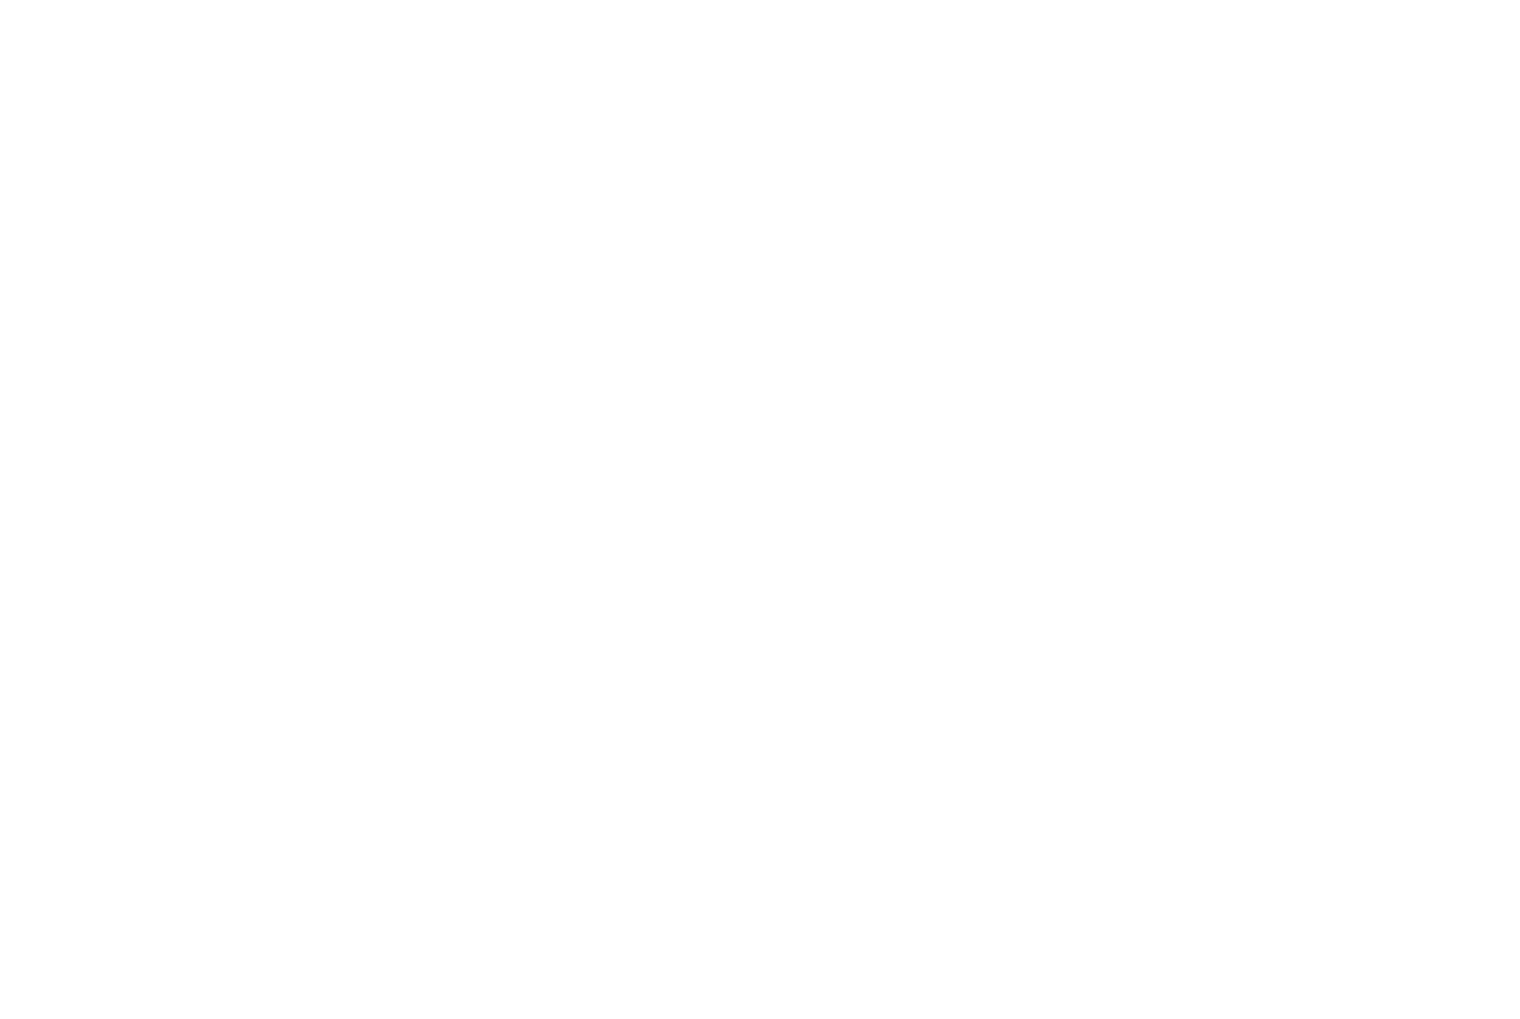

id                                               text             sub  \
0   0  ith accent clear and strong\n,  ráma, aye ráma...            that   
1   0  ith accent clear and strong\n,  ráma, aye ráma...            that   
2   0  ith accent clear and strong\n,  ráma, aye ráma...  stream_rámáyan   
3   1  ,\n,hail, arch-ascetic, pious, good, and kind!...               i   
4   1  ,\n,hail, arch-ascetic, pious, good, and kind!...               i   

  relation             object             PERSON            all_ent  \
0    flows          feet_path                NaN            free.(4   
1     feel          feet_path                NaN            free.(4   
2   leaves  fount_world_stain                NaN            free.(4   
3     pray               thee  canto i. nárad.(7              first   
4     pray               thee  canto i. nárad.(7  canto i. nárad.(7   

                                                noun  
0  [ith accent clear and strong\n,  ráma, aye rám...  
1  [ith accent clear and strong\n,  ráma, aye rám...  
2  [ith accent clear and strong\n,  ráma, aye rám...  
3  [,\n,hail, arch-ascetic, pious, good, and kind...  
4  [,\n,hail, arch-ascetic, pious, good, and kind...

<Figure size 640x480 with 0 Axes>

In [22]:
#v1.2 /Aug08,2023
def spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "DATE",
                records_groupby_id = None, ent_plot_filter = None, threeD_plot = True,
                pos_layout = 'circular_layout', plot_save_path=None):

    '''
    1.4 Aug31,2023 bug fixed, removed else part from each list to dict to df
    1.3 Aug28,2023 updated dtf_final1 after filter/text_data.lower()
    1.2 Aug08,2023 updated for 3D plot/pos for draw
    1.1 May12,2023 added records_groupby_id option/ used to group records like chat @ user is level
    1.0 May03,2023 initial version

    plot_save_path: if not none then it will create Network Graph
    ent_type = NUMERIC, PERSON, ORG, LOC, NUMERIC, DATE
    
    draw methods >>
     'draw',
     'draw_circular',
     'draw_kamada_kawai',
     'draw_networkx',
     'draw_planar',
     'draw_random',
     'draw_shell',
     'draw_spectral',
     'draw_spring',
    '''

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    import spacy 
    import textacy  #0.12.0
    import networkx as nx  #3.0 (also pygraphviz==1.10)
    import dateparser #1.1.7
    
    text_data = text_data.lower()
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text_data)

    #3 from text to a list of sentences
    lst_docs = [sent for sent in doc.sents]

    dic_sub_vrb_obj = {"id":[], "text":[], "sub":[], "relation":[], "object":[]}
    dic_ent = {"id":[], "text":[], ent_type:[]}
    dic_all_ent = {"id":[], "text":[], 'all_ent':[]}
    dic_all_noun = {"id":[], "text":[], 'noun':[]}

    for n, sentence in enumerate(lst_docs):
        #print(f'\n sentence no:{n}, sentence:{sentence}')
        lst_sub_vrb_obj = list(textacy.extract.subject_verb_object_triples(sentence))
        lst_ent = list(textacy.extract.entities(sentence, include_types={ent_type}))
        lst_all_ent = list(textacy.extract.entities(sentence))
        lst_all_noun = list(textacy.extract.noun_chunks(sentence))
        list_all_tokens = list(textacy.extract.words(sentence))
        
#         for token in sentence:
#             print(f'token:{token}, text:{token.text}, tag:{token.tag_}, POS:{token.pos_},\
#             DEP:{token.dep_}, explain:{spacy.explain(token.tag_)},\
#             has_vector:{token.has_vector}, vector_norm:{token.vector_norm}, is_oov:{token.is_oov}')

        #1 lst_ent
        if len(lst_ent) > 0:
            for attr in lst_ent:
                dic_ent["id"].append(n)
                dic_ent["text"].append(sentence.text)
                dic_ent[ent_type].append(str(attr))
#         else:
#             dic_ent["id"].append(n)
#             dic_ent["text"].append(sentence.text)
#             dic_ent[ent_type].append(np.nan)

        dtf_ent = pd.DataFrame(dic_ent)

        #2 lst_all_ent
        if len(lst_all_ent) > 0:
            for attr1 in lst_all_ent:
                dic_all_ent["id"].append(n)
                dic_all_ent["text"].append(sentence.text)
                dic_all_ent['all_ent'].append(str(attr1))
#         else:
#             dic_all_ent["id"].append(n)
#             dic_all_ent["text"].append(sentence.text)
#             dic_all_ent['all_ent'].append(np.nan)

        dtf_all_ent = pd.DataFrame(dic_all_ent)
        if records_groupby_id:
            dtf_all_ent = dtf_all_ent.groupby(records_groupby_id).agg(lambda x: list(x)).reset_index()

        #3 lst_sub_vrb_obj
        if len(lst_sub_vrb_obj) > 0:
            for m, sent in enumerate(lst_sub_vrb_obj): #one sentence can have more than 1 one sub/verb/obj
                subj = "_".join(map(str, sent.subject))
                obj  = "_".join(map(str, sent.object))
                relation = "_".join(map(str, sent.verb))
                dic_sub_vrb_obj["id"].append(n)
                dic_sub_vrb_obj["text"].append(sentence.text)
                dic_sub_vrb_obj["sub"].append(subj)
                dic_sub_vrb_obj["object"].append(obj)
                dic_sub_vrb_obj["relation"].append(relation)
#         else:
#             dic_sub_vrb_obj["id"].append(n)
#             dic_sub_vrb_obj["text"].append(sentence.text)
#             dic_sub_vrb_obj["sub"].append(np.nan)
#             dic_sub_vrb_obj["object"].append(np.nan)
#             dic_sub_vrb_obj["relation"].append(np.nan)

        dtf_sub_vrb_obj = pd.DataFrame(dic_sub_vrb_obj)

        #4 lst_all_noun
        if len(lst_all_noun) > 0:
            for attr1 in lst_all_noun:
                dic_all_noun["id"].append(n)
                dic_all_noun["text"].append(sentence.text)
                dic_all_noun['noun'].append(str(attr1))
#         else:
#             dic_all_noun["id"].append(n)
#             dic_all_noun["text"].append(sentence.text)
#             #dic_all_noun['all_ent'].append(np.nan)
#             dic_all_noun['all_ent'].append('tbc')

        dtf_all_noun = pd.DataFrame(dic_all_noun)
        dtf_all_noun = dtf_all_noun.groupby('id').agg(lambda x: list(x)).reset_index()

    # merge the all files
    dtf_final = dtf_sub_vrb_obj.merge(dtf_ent[[ent_type, 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_ent[['all_ent', 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_noun[['noun', 'id']], how="left", on="id")
    
    if plot_save_path:
        if ent_plot_filter:
            dtf_final1 = dtf_final[(dtf_final["sub"]==ent_plot_filter) | (dtf_final["object"]==ent_plot_filter)]

        ## create full graph
        G = nx.from_pandas_edgelist(dtf_final1, source="sub", target="object", 
                                    edge_attr="relation", create_using=nx.DiGraph())
        
        #chk pos_layout /TBC
#         if pos_layout == 'circular_layout':
#             pos=nx.circular_layout(G, k=1)
#         elif pos_layout == 'spectral_layout':
#             pos=nx.spectral_layout(G, k=1)
#         elif pos_layout == 'spring_layout':
#             pos=nx.spring_layout(G, k=1)
            
        pos = nx.spring_layout(G, k=1)
            
        ## plot
        plt.figure(figsize=(15,10))

        node_color = "skyblue"
        edge_color = "black"

        nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
                edge_color=edge_color, cmap=plt.cm.Dark2, 
                node_size=2000, connectionstyle='arc3,rad=0.1')

        nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                                 edge_labels=nx.get_edge_attributes(G,'relation'),
                                 font_size=12, font_color='black', alpha=0.6)
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph.png')
        
    if threeD_plot: #1.2
        f = ent_plot_filter
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection="3d")
        #ax = fig.gca(projection='3d')
        pos = nx.spring_layout(G, k=2.5, dim=3)

        nodes = np.array([pos[v] for v in sorted(G) if v!=f])
        center_node = np.array([pos[v] for v in sorted(G) if v==f])

        edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
        center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

        ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
        ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

        for link in edges:
            ax.plot(*link.T, color="grey", lw=0.5)
        for link in center_edges:
            ax.plot(*link.T, color="red", lw=0.5)

        for v in sorted(G):
            ax.text(*pos[v].T, s=v)
        for u,v in G.edges():
            attr = nx.get_edge_attributes(G, "relation")[(u,v)]
            ax.text(*((pos[u]+pos[v])/2).T, s=attr)

        ax.set(xlabel=None, ylabel=None, zlabel=None, 
               xticklabels=[], yticklabels=[], zticklabels=[])
        ax.grid(False)
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph3D.png')

    return dtf_final, G

data_path = 'D:\\dataset\\graph\\Ramayana\\'

with open(data_path+'ramayana.txt', 'r', encoding="utf8") as f:
    text_data_list = f.readlines()
    
#text_data = ','.join([str(i) for i in df[text_col].values.tolist()]) # when data is from df
text_data = ','.join([str(i) for i in text_data_list]) # when data is in list

#starting char are index, that's why started from 18500
#text_data = text_data[18500:1000000]#NER models require roughly 1GB of temporary memory per 100,000 characters in the input
text_data = text_data[18500:100000]
#text_data = text_data[18500:20000]

## filter
ent_plot_filter = 'I'
#ent_plot_filter = 'Rama'

dtf_final, G = spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "PERSON",
        records_groupby_id = None, ent_plot_filter = ent_plot_filter, threeD_plot = False, plot_save_path=data_path)

dtf_final.head()

C:\Users\ajverma\AppData\Local\Temp\ipykernel_1576\3117432059.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
C:\Users\ajverma\AppData\Local\Temp\ipykernel_1576\3117432059.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_kn['grp_by_col']=dtf_kn.apply(lambda x: ','.join(sorted([x['sub'],x['object']])), axis = 1)


len-G.nodes: 607
companies.html
Basic topological attributes
-----------
Total # nodes:  607
Total # edges:  590
First 10 edges:  [('bow', 'he'), ('he', 'birth'), ('he', 'to_hasten_to_the_gathering'), ('he', 'tale_listening_ear'), ('he', 'points_people'), ('he', 'path'), ('he', 'válmíki'), ('he', 'way'), ('he', 'upholders'), ('he', 'guide')]
First 10 nodes:  ['bow', 'he', 'fame_glory_state', 'they', 'glory', 'king', 'race', 'who', 'to_pay', 'spade']
Density of the graph:  0.0032078990436111158
----------------------------------------------------------------
Multigraph ?
-----------
This is NOT a MULTI-GRAPH
----------------------------------------------------------------
Total nodes in the graph:  607
Average degree of graph is :  1.9439868204283361
Max degree of graph is :  94
Min degree of graph is :  1


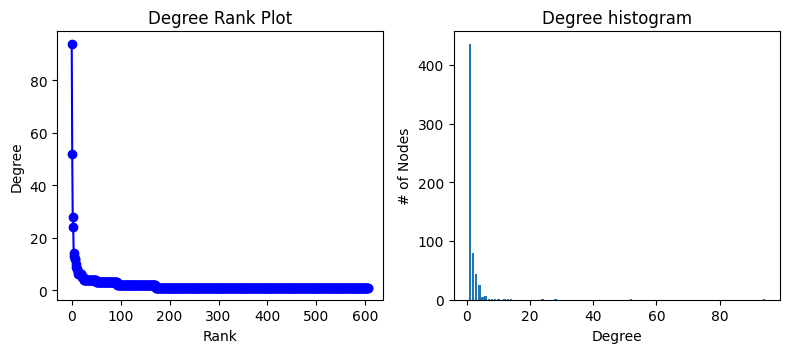

94
# nodes in subgraph :  0
ramayan.html


frm_node                to_node  partnerships
0                 bow                     he          18.0
1    fame_glory_state                   they          12.0
2               glory                   they           9.0
3                king                   they           8.0
4                race                    who           8.0
..                ...                    ...           ...
586                he      sandals(30_pledge           1.0
587             might                     we           1.0
588             might                    woe           1.0
589              city  king_daśaratha_ground           1.0
590    god_demon_e’er                   life           1.0

[591 rows x 3 columns]

In [45]:
#https://medium.com/@preeti.chauhan8/learn-a-z-of-knowledge-graphs-step-by-step-part-5-usecase-pagerank-driven-company-importance-in-1ea953a3bcca
#--- import relevant libs

import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import tensorflow as tf
import networkx as nx
import pyvis
from IPython.core.display import display, HTML
from pyvis import network as net
from pyvis.network import Network

#--- custom defined functions to be used later in the code

#--- flatten nested list
def flattenList(nested_list):
    flat_list = [item for sublist in nested_list for item in sublist]
    return flat_list

#----- removes up to n degree nodes and return the subgraph
def rmv_n_dgree_nodes(G,deg):
    # remove low-degree nodes
    low_degree = [n for n, d in G.degree() if d <= deg]
    low_degree_graph = G.remove_nodes_from(low_degree)
    return low_degree_graph

#--- degree analysis of the graph
def degree_analysis(G):
    #----1.) degree analysis
    print("Total nodes in the graph: ",len(G.nodes()))
    G_degree=G.degree()
    print("Average degree of graph is : ", np.mean([d for _, d in G_degree]))
    print("Max degree of graph is : ", np.max([d for _, d in G_degree]))

    print("Min degree of graph is : ", np.min([d for _, d in G_degree]))
            
    #----2.) plot degree distribution
        
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of fb pages graph conected by likes", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

#--- get immediate neighbourhood (node list) from a initial list of nodes with degree>= min_deg. 
#----You can modify it to get n level neighbourhood also!
def get_neighbourhood(G,target_nodes,min_deg=0):

    """This function takes a Graph and list of initial nodes. Returns the set of immediate neighbours of these nodes which is grater than degree provided"""
    total_neighbours=0
    nodes_set=[target_nodes]
    for node in target_nodes:
        #print(node)
        neighbours=list(G.neighbors(node))
        total_neighbours=total_neighbours+len(neighbours)     
        nodes_set.append(neighbours)
    print(total_neighbours)
    nodes_set=flattenList(nodes_set)
    
    #-- get the list of all nodes with lower degrees:
    if min_deg >0:
        low_degree = [n for n, d in G.degree() if d <= min_deg]
        #--- minus these low degree odes from nodes_set
        nodes_set = [x for x in nodes_set if x not in low_degree]
    
    return list(set(nodes_set))


dtf_kn = dtf_final[['sub', 'object']]

dtf_kn['grp_by_col']=dtf_kn.apply(lambda x: ','.join(sorted([x['sub'],x['object']])), axis = 1)
dtf_kn=dtf_kn.groupby(['grp_by_col']).size().sort_values(ascending=False).reset_index(name='partnerships').drop_duplicates()
dtf_kn['partnerships'] = np.ceil((dtf_kn['partnerships'].values / 2))
dtf_kn['frm_node']=dtf_kn.apply(lambda x: x['grp_by_col'].split(',')[0], axis = 1)
dtf_kn['to_node']=dtf_kn.apply(lambda x: x['grp_by_col'].split(',')[1], axis = 1)
dtf_kn=dtf_kn.drop(columns=['grp_by_col'])
cols=['frm_node','to_node','partnerships']
dtf_kn = dtf_kn[cols]


import tensorflow as tf
import networkx as nx
from pyvis.network import Network

#--- create weighted G from edge list df
with tf.device('/GPU:0'):
    G = nx.from_pandas_edgelist(dtf_kn, 'frm_node', 'to_node',edge_attr='partnerships')
print('len-G.nodes:',len(G.nodes()))

#--- basic ifo about the graph
#print('info-G:',nx.info(G))

#--- let's save this graph for later use
nx.write_gexf(G, "techcompaniesnetwork_full.gexf")

#---- reading gefx graph
#G1=nx.read_gexf("./techcompaniesnetwork_full.gexf")

#---- let's visualize the graph, since graph is too big, let's pick 1000 nodes to be visualized
#--- create subgraph view with nodes ids < 101

'''
Warning: When  cdn_resources is 'local' jupyter notebook has issues displaying graphics on chrome/safari.
Use cdn_resources='in_line' or cdn_resources='remote' if you have issues viewing graphics in a notebook.
companies.html
'''
cdn_resources='in_line'
#cdn_resources='remote'

top100=dtf_kn['frm_node'].unique()[0:100]
def filter_node(n1):
    return n1 in top100

with tf.device('/GPU:0'):
    view = nx.subgraph_view(G, filter_node=filter_node)
#view.nodes()

G_100=view

#----- plot the graph ---

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
got_net.from_nx(G_100)
got_net.show("companies.html")

#--- check no. of nodes and edges
import networkx.algorithms.components as nx_comp
import networkx.algorithms.connectivity as nx_conn
    
#shortest_path_lengths=shortest_path_lengths()
with tf.device('/GPU:0'):
        #-- let's see basic stats, no. of nodes and edges
        print("Basic topological attributes")
        print("-----------")
        print("Total # nodes: ", len(G.nodes()))
        print("Total # edges: ", len(G.edges()))
        edges= G.edges()
        nodes= G.nodes()
        print("First 10 edges: ",list(edges)[0:10])
        print("First 10 nodes: ",list(nodes)[0:10])
        # This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
        # reusing the pre-computed shortest path lengths!
        #diameter = max(nx.eccentricity(G, sp=shortest_path_lengths()).values())
        #print("Diameter of the graph is : ",diameter)

        #---- Density of the graph, to measure how dense or sparse the graph is
        print("Density of the graph: ",nx.density(G))
        print("----------------------------------------------------------------")

#--- Is this a multigraph
print("Multigraph ?")
print("-----------")
if G.is_multigraph():
    # We can check if there is a walk through the graph that crosses each node once and only once, and begins and ends at the same point. 
    # Such a walk is called an Eulerian circuit of a multigraph.
    if nx.is_eulerian(G):
        print("This is MULTI-GRAPH and a Eulerian circuit exists in a multigraph")
    else:
        print("This is MULTI-GRAPH but NO Eulerian circuit exists in a multigraph")
else:
    print("This is NOT a MULTI-GRAPH")
print("----------------------------------------------------------------")

#---- Calculate the weighted pagerank og the bigger graph G
df_pagerank= pd.DataFrame(sorted(nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight').items(), key=lambda x:x[1], reverse=True), columns=['Companies', "PageRank"])
df_pagerank.head(20)

'''since the graph is still huge to be plotted, will prune low degree nodes and will plot resulting graph — — 
before doing so, let’s do degree analysis of the graph
'''

#-- call degree analysis function
degree_analysis(G)

#-- Let's get their neighborhood and prune the low degree nodes
min_degree=200
top_n =1 #--- lets see neighbourhood of top company
lst_top_n=df_pagerank.head(top_n)['Companies']
top_n_nghbr=get_neighbourhood(G,lst_top_n,min_degree)
# geerate top 10 comapnies neighbourhood graph
top_n_nghbr_subgraph=nx.subgraph(G,top_n_nghbr)
print("# nodes in subgraph : ",len(top_n_nghbr_subgraph.nodes()))

#--- now plot the above graph where node size represet pagerak
#--- get the pagerank for the nnodes in graph
top_n_nodes= top_n_nghbr_subgraph.nodes()
df_top_n_nodes =pd.DataFrame(top_n_nodes,columns=['Companies'])
df_top_n_nodes_pr=pd.merge(df_top_n_nodes,df_pagerank,how='left',on='Companies')
df_top_n_nodes_pr.head()

node_size= df_top_n_nodes_pr['PageRank']*5000
node_list=list(top_n_nghbr_subgraph.nodes)

#creating size and label dictioaries
size_dict={node:int(node_size[idx]) for idx,node in enumerate(node_list)}
label_dict={node:str(node_list[idx]) for idx,node in enumerate(node_list)}

#----- plot the graph ---
#g_nx = nx.draw(top5_nghbr_subgraph, nodelist=node_list, node_size=node_size)
#plt.show()

#Get and assign node sizes proportional to the pagerak
nx.set_node_attributes(top_n_nghbr_subgraph, size_dict, name="size")

#Get and assign pyvis labels for elegant plotting
nx.set_node_attributes(top_n_nghbr_subgraph, label_dict, name="label")

#Remap the node ids to strings to avoid error with PyVis
#g_nx = nx.relabel_nodes(g_nx, label_dict)    

#Plot the resulting netwrokX graph using PyVis
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)#, select_menu=True)
g_pyvis.from_nx(top_n_nghbr_subgraph)
#g_pyvis.show_buttons(filter_=['nodes']) # Option to control visualization of nodes
g_pyvis.show('ramayan.html')
dtf_kn

In [25]:
dtf_final.shape

dtf_final['sub'].value_counts()

sub
he          331
they        227
who         116
that         63
i            49
           ... 
rites         1
nágas         1
feelings      1
glory         1
land          1
Name: count, Length: 258, dtype: int64

In [ ]:
print(f'token:{token}, text:{token.text}, tag:{token.tag_}, POS:{token.pos_},\
        DEP:{token.dep_}, explain:{spacy.explain(token.tag_)},\
        has_vector:{token.has_vector}, vector_norm:{token.vector_norm}, is_oov:{token.is_oov}')
    

In [58]:
dtf_final

id                                               text sub relation  \
57       3  ,\n,Hail, arch-ascetic, pious, good, and kind!...   I     pray   
58       3  ,\n,Hail, arch-ascetic, pious, good, and kind!...   I     pray   
59       3  ,\n,Hail, arch-ascetic, pious, good, and kind!...   I     pray   
60       3  ,\n,Hail, arch-ascetic, pious, good, and kind!...   I     pray   
61       3  ,\n,Hail, arch-ascetic, pious, good, and kind!...   I     pray   
...    ...                                                ...  ..      ...   
13035  249  ,Regard the world of men below,\n,And slay the...   I    guard   
13036  249  ,Regard the world of men below,\n,And slay the...   I    guard   
13037  249  ,Regard the world of men below,\n,And slay the...   I    guard   
13038  249  ,Regard the world of men below,\n,And slay the...   I    guard   
13039  249  ,Regard the world of men below,\n,And slay the...   I    guard   

      object PERSON            all_ent  \
57      thee   Hail               Hail   
58      thee   Hail      Saint Válmíki   
59      thee   Hail               Hail   
60      thee   Hail               Hail   
61      thee   Hail  Canto I. Nárad.(7   
...      ...    ...                ...   
13035  earth  Rávaṇ              nymph   
13036  earth  Rávaṇ  minstrel throng\n   
13037  earth  Rávaṇ              Madhu   
13038  earth  Rávaṇ   Champion of Gods   
13039  earth  Rávaṇ              Rávaṇ   

                                                    noun  
57     [lord, lore, mind, Bards, Válmíki, hail, ,\n,\...  
58     [lord, lore, mind, Bards, Válmíki, hail, ,\n,\...  
59     [lord, lore, mind, Bards, Válmíki, hail, ,\n,\...  
60     [lord, lore, mind, Bards, Válmíki, hail, ,\n,\...  
61     [lord, lore, mind, Bards, Válmíki, hail, ,\n,\...  
...                                                  ...  
13035  [world, men, Gods’ tremendous foe, suppliant G...  
13036  [world, men, Gods’ tremendous foe, suppliant G...  
13037  [world, men, Gods’ tremendous foe, suppliant G...  
13038  [world, men, Gods’ tremendous foe, suppliant G...  
13039  [world, men, Gods’ tremendous foe, suppliant G...  

[570 rows x 8 columns]

In [64]:
dtf_final['sub'].value_counts()

sub
He                 1177
he                  998
They                592
I                   570
journeyed_reach     360
                   ... 
priests               1
Scripture             1
devotee               1
sages                 1
garb                  1
Name: count, Length: 288, dtype: int64

In [66]:
dtf_final['sub'] = dtf_final['sub'].apply(lambda x: str(x).lower())

In [67]:
dtf_final['sub'].value_counts()

sub
he                 2175
they                816
i                   570
who                 378
journeyed_reach     360
                   ... 
land                  1
song                  1
priests               1
thou                  1
scripture             1
Name: count, Length: 278, dtype: int64

In [68]:
text_data

'ith accent clear and strong\n,  Ráma, aye Ráma, in his deathless lay.\n,\n,Where breathes the man can listen to the strain\n,  That flows in music from Válmíki’s tongue,\n,Nor feel his feet the path of bliss attain\n,  When Ráma’s glory by the saint is sung!\n,\n,The stream Rámáyan leaves its sacred fount\n,  The whole wide world from sin and stain to free.(4)\n,The Prince of Hermits is the parent mount,\n,  The lordly Ráma is the darling sea.\n,\n,Glory to him whose fame is ever bright!\n,  Glory to him, Prachetas’(5)holy son!\n,Whose pure lips quaff with ever new delight\n,  The nectar-sea of deeds by Ráma done.\n,\n,Hail, arch-ascetic, pious, good, and kind!\n,  Hail, Saint Válmíki, lord of every lore!\n,Hail, holy Hermit, calm and pure of mind!\n,  Hail, First of Bards, Válmíki, hail once more!\n,\n,\n,\n,\n,\n,BOOK I.(6)\n,\n,\n,\n,\n,Canto I. Nárad.(7)\n,\n,\n,OM.(8)\n,\n,  To sainted Nárad, prince of those\n,Whose lore in words of wisdom flows.\n,Whose constant care and chief d

In [71]:
text_data.lower().replace('\n', '')

'ith accent clear and strong,  ráma, aye ráma, in his deathless lay.,,where breathes the man can listen to the strain,  that flows in music from válmíki’s tongue,,nor feel his feet the path of bliss attain,  when ráma’s glory by the saint is sung!,,the stream rámáyan leaves its sacred fount,  the whole wide world from sin and stain to free.(4),the prince of hermits is the parent mount,,  the lordly ráma is the darling sea.,,glory to him whose fame is ever bright!,  glory to him, prachetas’(5)holy son!,whose pure lips quaff with ever new delight,  the nectar-sea of deeds by ráma done.,,hail, arch-ascetic, pious, good, and kind!,  hail, saint válmíki, lord of every lore!,hail, holy hermit, calm and pure of mind!,  hail, first of bards, válmíki, hail once more!,,,,,,book i.(6),,,,,canto i. nárad.(7),,,om.(8),,  to sainted nárad, prince of those,whose lore in words of wisdom flows.,whose constant care and chief delight,were scripture and ascetic rite,,the good válmíki, first and best,of he